This case study is part of the 100 Days of Code: The Complete Python Pro Bootcamp for 2023 and is a reccomended portfolio project.

The purpose of the case study is the analysis of the space race from the begginging in 1957 till 2020.

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [4]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
%pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 53.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=3a05e2f0ca34bc9897ba3838fd0e35084feada9812ac6a87f4f1cef08e36c52a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


### Import Statements

In [203]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import re

# These might be helpful:
from iso3166 import countries, Country
from datetime import datetime, timedelta

### Notebook Presentation

In [204]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [205]:
df_data = pd.read_csv('/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [206]:
df_data.shape

(4324, 9)

In [207]:
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


There are 4324 entries, each conataining 9 columns. The 2 first columns contain a duplicated index and will be deleted. The rest of the columns provide information about:
- Organisation that launched the rocket
- Location of the launch
- Date of the launch
- Model and name of the rocket
- Status of the rocket
- Cost of the launch
- Whether the mission was a success or not.

Now I will clean and explore the data in more detail.

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

Now I will delete the columns containing junk data.

In [208]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

Then I will look for duplicates and delete them.

In [209]:
print(f'There are {df_data.isna().sum()} missing values')
print(f'There are {df_data.duplicated().sum()} duplicated values')
df_data.drop_duplicates(inplace=True)
print(f'There are {df_data.duplicated().sum()} duplicated values')

There are Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64 missing values
There are 1 duplicated values
There are 0 duplicated values


There are missing values in the Price column, however it will still be useful in the analysis, so I will not be deleting it.

Now I will change the data type of the price column to a float.

In [210]:
# deleting the comas from the price column
df_data['Price'] = df_data['Price'].str.replace(',', '')
# changing the type
df_data['Price'] = df_data['Price'].astype('float')

Additionally, I will convert the Date column to datetime and create new columns for the year, the month and year + month of the launch, since they will be useful in further analysis.

In [211]:
# extracting the date and changing the type
df_data['New_Date'] = df_data['Date'].str.extract(r'(\w{3}) (\d{2}), (\d{4})').apply(lambda x: ' '.join(x), axis=1)
df_data['New_Date'] = pd.to_datetime(df_data['New_Date'], format=('%b %d %Y'))
# creating new columns
df_data['Year'] = df_data['New_Date'].dt.year
df_data['Month'] = df_data['New_Date'].dt.month
df_data['Year_Month'] = df_data['New_Date'].dt.strftime('%Y-%m')

## Descriptive Statistics

Now it's time to take a closer look at the data.

In [212]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4323 non-null   object        
 1   Location        4323 non-null   object        
 2   Date            4323 non-null   object        
 3   Detail          4323 non-null   object        
 4   Rocket_Status   4323 non-null   object        
 5   Price           963 non-null    float64       
 6   Mission_Status  4323 non-null   object        
 7   New_Date        4323 non-null   datetime64[ns]
 8   Year            4323 non-null   int64         
 9   Month           4323 non-null   int64         
 10  Year_Month      4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 405.3+ KB


In [213]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,New_Date,Year,Month,Year_Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07,2020,8,2020-08
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,2020,8,2020-08
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,2020,8,2020-08
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30,2020,7,2020-07
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30,2020,7,2020-07


In [214]:
df_data.sample(n=15)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,New_Date,Year,Month,Year_Month
837,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Dec 21, 2007 21:41 UTC",Ariane 5 GS | Rascom-QAF1 & Horizons-2,StatusRetired,NaN,Success,2007-12-21,2007,12,2007-12
2471,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Thu Mar 27, 1980 07:30 UTC",Cosmos-3M (11K65M) | Cosmos 1169,StatusRetired,NaN,Success,1980-03-27,1980,3,1980-03
1346,ILS,"SLC-36B, Cape Canaveral AFS, Florida, USA","Mon Dec 08, 1997 23:52 UTC",Atlas IIAS | Galaxy 8i,StatusRetired,NaN,Success,1997-12-08,1997,12,1997-12
4269,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA","Fri Mar 11, 1960 13:00 UTC",Thor DM-18 Able-IV | Pioneer 5,StatusRetired,NaN,Success,1960-03-11,1960,3,1960-03
3017,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sun Jul 14, 1974 05:17 UTC",Atlas-E/F PTS | P73-3,StatusRetired,NaN,Success,1974-07-14,1974,7,1974-07
2437,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 06, 1980 23:31 UTC",Atlas-SLV3D Centaur-D1AR | Intelsat V -502,StatusRetired,NaN,Success,1980-12-06,1980,12,1980-12
3886,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA","Tue Apr 19, 1966 19:12 UTC",Atlas-SLV3 Agena-D | KH-7 Gambit 4027,StatusRetired,NaN,Success,1966-04-19,1966,4,1966-04
844,VKS RF,"Site 132/1, Plesetsk Cosmodrome, Russia","Thu Nov 01, 2007 00:51 UTC",Cosmos-3M (11K65M) | SAR-Lupe 3,StatusRetired,NaN,Success,2007-11-01,2007,11,2007-11
991,CASC,"LC-7, Taiyuan Satellite Launch Center, China","Sun Jul 25, 2004 07:05 UTC",Long March 2C | Double Star 2,StatusActive,30.80,Success,2004-07-25,2004,7,2004-07
2329,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Thu Jun 03, 1982 21:30 UTC",Cosmos-3MRB (65MRB) | Cosmos 1374 (BOR-4 Space...,StatusRetired,NaN,Success,1982-06-03,1982,6,1982-06


The data is clean so I can begin the analysis.

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [215]:
missions_per_org = df_data['Organisation'].value_counts()
fig = px.histogram(x=missions_per_org.index,
                   y=missions_per_org.values,
                   color=missions_per_org.index)
fig.update_layout(yaxis_title='Number of Space Missions per Organisation',
                  xaxis_title_text='Organisation')
fig.show()

From the graph we can see that the organisation with the largest amount of launches is RVSN USSR with 1777 launches, that's nearly 1500 more than the second place - Arianespace(279).

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [216]:
act_vs_ret = px.histogram(df_data,
                          x='Rocket_Status',
                          color='Rocket_Status',
                          labels={
                              "Rocket_Status": "Rocket Status"
                          })
act_vs_ret.update_layout(xaxis_title='Rocket Status',
                         yaxis_title='Number of Rockets')
act_vs_ret.show()

There are 3534 retired and 789 active rockets.

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [217]:
success = px.histogram(df_data,
                       x='Mission_Status',
                       color='Mission_Status')
success.show()

In [218]:
df_data.groupby('Mission_Status').agg({'Mission_Status': pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3878


Vast majority of missions ends up being succcessful, but there still are 3 types of failures:
- full
- partial
- prelaunch,

445 missions unfortunetally failed.

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [219]:
# price = df_data.grou
price_hist = px.histogram(df_data,
                          x='Price')
price_hist.show()

The majority of missions cost less than 225 million USD, but there are severall outliers. 2 of them are more than 5 times greater than our next observation, I will create a plot without them, in order to to see the distribution better.

In [220]:
price_wo_out = df_data[df_data['Price']<2000]['Price']
price_wo_out.describe()
new_price_hist = px.histogram(price_wo_out,
                              nbins=100)
new_price_hist.show()

Most mission - more than 400 - cost between 20 and 60 million USD, but there is a large spike around 450 million USD with 136 observations.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In order to show the number of launches by country, I will need to extract the country from the location column and convert entries that do not follow the iso3166 convention.

In [221]:
# extracting the country
df_data['Country'] = df_data['Location'].str.extract(r',\s*([^,]*)$')
# renaming entries
countries = df_data.groupby('Country').agg({'Country': pd.Series.count})
countries = countries.rename(index={'Russia': 'Russian Federation',
                            'New Mexico': 'United States',
                            'Yellow Sea': 'China',
                            'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
                            'Pacific Missile Range Facility': 'United States',
                            'Barents Sea': 'Russian Federation',
                            'Gran Canaria': 'United States',
                            'USA': 'United States',
                            'South Korea': 'Korea, Republic of',
                            'North Korea': "Korea, Democratic People's Republic of",
                            'Iran': 'Iran, Islamic Republic of',
                            'Pacific Ocean': "United States"})
combined_co = countries.groupby(countries.index).sum()
combined_co

,Country
Country,
Australia,6
Brazil,3
China,268
France,303
India,76
"Iran, Islamic Republic of",14
Israel,11
Japan,126
Kazakhstan,701


In order to use the Choropleth Map, I have to convert to country names to Alpha-3 code.

In [222]:
# Function to convert country name to Alpha-3 code
def convert_to_alpha3(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            return country.alpha_3
        else:
            return None
    except AttributeError:
        return None  # Return None for unrecognized country names
# converting and adding codes to the dataframe
combined_co["Alpha-3 Code"] = combined_co.index.map(convert_to_alpha3)
combined_co

,Country,Alpha-3 Code
Country,,
Australia,6,AUS
Brazil,3,BRA
China,268,CHN
France,303,FRA
India,76,IND
"Iran, Islamic Republic of",14,IRN
Israel,11,ISR
Japan,126,JPN
Kazakhstan,701,KAZ


In [223]:
world_map = px.choropleth(combined_co,
                          locations="Alpha-3 Code",
                          color="Country",
                          hover_name=combined_co.index,
                          color_continuous_scale=px.colors.sequential.matter)
world_map.show()

Russia takes the first place with 1398 launches, however USA is only 12 behind. Surprisingly, Kazakhstan is 3rd with 701 launches.

Since I will be using more maps I will add a new column to the main dataframe containing the official country names.

In [224]:
replace_dict = {'Russia': 'Russian Federation',
                'New Mexico': 'United States',
                'Yellow Sea': 'China',
                'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
                'Pacific Missile Range Facility': 'United States',
                'Barents Sea': 'Russian Federation',
                'Gran Canaria': 'United States',
                'USA': 'United States',
                'South Korea': 'Korea, Republic of',
                'North Korea': "Korea, Democratic People's Republic of",
                'Iran': 'Iran, Islamic Republic of',
                'Pacific Ocean': "United States"}
df_data['Country_Convention'] = df_data['Country'].replace(replace_dict)

# Use a Choropleth Map to Show the Number of Failures by Country


In order to create a map of failed launches by country, I have to take only entries containing failed launches and group them by country.

In [225]:
failures = df_data.loc[df_data['Mission_Status']=='Failure']
fail = failures.groupby('Country_Convention').agg({'Mission_Status': pd.Series.count})
fail

,Mission_Status
Country_Convention,
Australia,3
Brazil,2
China,19
France,13
India,8
"Iran, Islamic Republic of",8
Israel,2
Japan,10
Kazakhstan,72


In [226]:
fail["Alpha-3 Code"] = fail.index.map(convert_to_alpha3)
fail

,Mission_Status,Alpha-3 Code
Country_Convention,,
Australia,3,AUS
Brazil,2,BRA
China,19,CHN
France,13,FRA
India,8,IND
"Iran, Islamic Republic of",8,IRN
Israel,2,ISR
Japan,10,JPN
Kazakhstan,72,KAZ


In [227]:
fail_map = px.choropleth(fail,
                          locations="Alpha-3 Code",
                          color="Mission_Status",
                          hover_name=fail.index,
                          color_continuous_scale=px.colors.sequential.matter)
fail_map.show()

USA has the most failed launches with 132, followed by Kazakhstan with 72 and Russia with 63.

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

To create a sunburst chart, I will group the data by countries, orgs and status of the mission.

In [228]:
country_org = df_data.groupby(by=['Country', 'Organisation', 'Mission_Status'],
                              as_index=False).agg({'Detail': pd.Series.count})
country_org = country_org.sort_values('Detail', ascending=False)
country_org.head()

,Country,Organisation,Mission_Status,Detail
86,Russia,RVSN USSR,Success,1119
60,Kazakhstan,RVSN USSR,Success,495
21,France,Arianespace,Success,267
11,China,CASC,Success,229
107,USA,General Dynamics,Success,203


To make the chart more readable, I will consider all failure types as one category.

In [229]:
replace_dict = {'Partial Failure': 'Failure',
                'Prelaunch Failure': 'Failure'}

country_org['Mission_Status'] = country_org['Mission_Status'].replace(replace_dict)

In [230]:
burst = px.sunburst(country_org,
                    path=['Country', 'Organisation', 'Mission_Status'],
                    values='Detail',
                    title='Who is successful when launching rockets?')
burst.update_layout(xaxis_title='Country',
                    yaxis_title='Organisation')
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

To get the amount of money spent by an organisation, I will group the dataframe by Organisation column and delete entries that contain missing values.

In [231]:
money_spent_by_org = df_data.groupby('Organisation').agg({'Price': pd.Series.sum})
money_spent_by_org_wo_empty = money_spent_by_org.loc[money_spent_by_org['Price'] > 0]
money_spent_by_org_wo_empty = money_spent_by_org_wo_empty.sort_values('Price', ascending=False)

In [232]:
money = px.bar(money_spent_by_org_wo_empty,
               x=money_spent_by_org_wo_empty.index,
               y='Price',
               color='Price')
money.update_layout(yaxis_title='Money spent by Organisations on Space Launches(in millions USD)')
money.show()

NASA spent most money per launch, nearly 5 times more than Arianespace which came second.

# Analyse the Amount of Money Spent by Organisation per Launch

In [233]:
money_per_launch = df_data.groupby('Organisation').agg({'Price': pd.Series.mean})
money_per_launch = money_per_launch.loc[money_spent_by_org['Price'] > 0]
money_per_launch = money_per_launch.sort_values('Price', ascending=False)

In [234]:
per_launch = px.bar(money_per_launch,
               x=money_per_launch.index,
               y='Price',
               color='Price')
per_launch.update_layout(yaxis_title='Money spent by Organisations per launch(in millions USD)')
per_launch.show()

However, RVSN USSR on average spent 10 times more than NASA per launch.

# Chart the Number of Launches per Year

After looking at the cost of space mission, I will look into how the number of launches changed over the years.
First, a line chart of launches per year.

In [235]:
launch_per_year = df_data.groupby('Year').agg({'Date': pd.Series.count})
launch_per_year = launch_per_year.sort_values('Year')
# The plot will not include the data from 2020, since the data was scraped in August I do not have the complete data for that year
launch_per_year = launch_per_year.loc[launch_per_year.index < 2020]

In [236]:
launch_yearly = px.line(launch_per_year,
                        x=launch_per_year.index,
                        y='Date',
                        title='Number of launches per year')
launch_yearly.show()

There is a spike in the number of space missions in the 1960s and 1970s, then a large drop from more than 100 launches a year to between 40 and 80 for the next 40 years, with a resurgance in the mid 2010s, with 118 launches in 2018.

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [237]:
monthly_launches = df_data.groupby(by='Year_Month', as_index=False).agg({'Date': pd.Series.count})
monthly_launches.head()

,Year_Month,Date
0,1957-10,1
1,1957-11,1
2,1957-12,1
3,1958-02,2
4,1958-03,3


In [238]:
print(monthly_launches.loc[monthly_launches['Date'] == monthly_launches['Date'].max()])

    Year_Month  Date
164    1971-12    18


The largest number of launches happened in December of 1971.

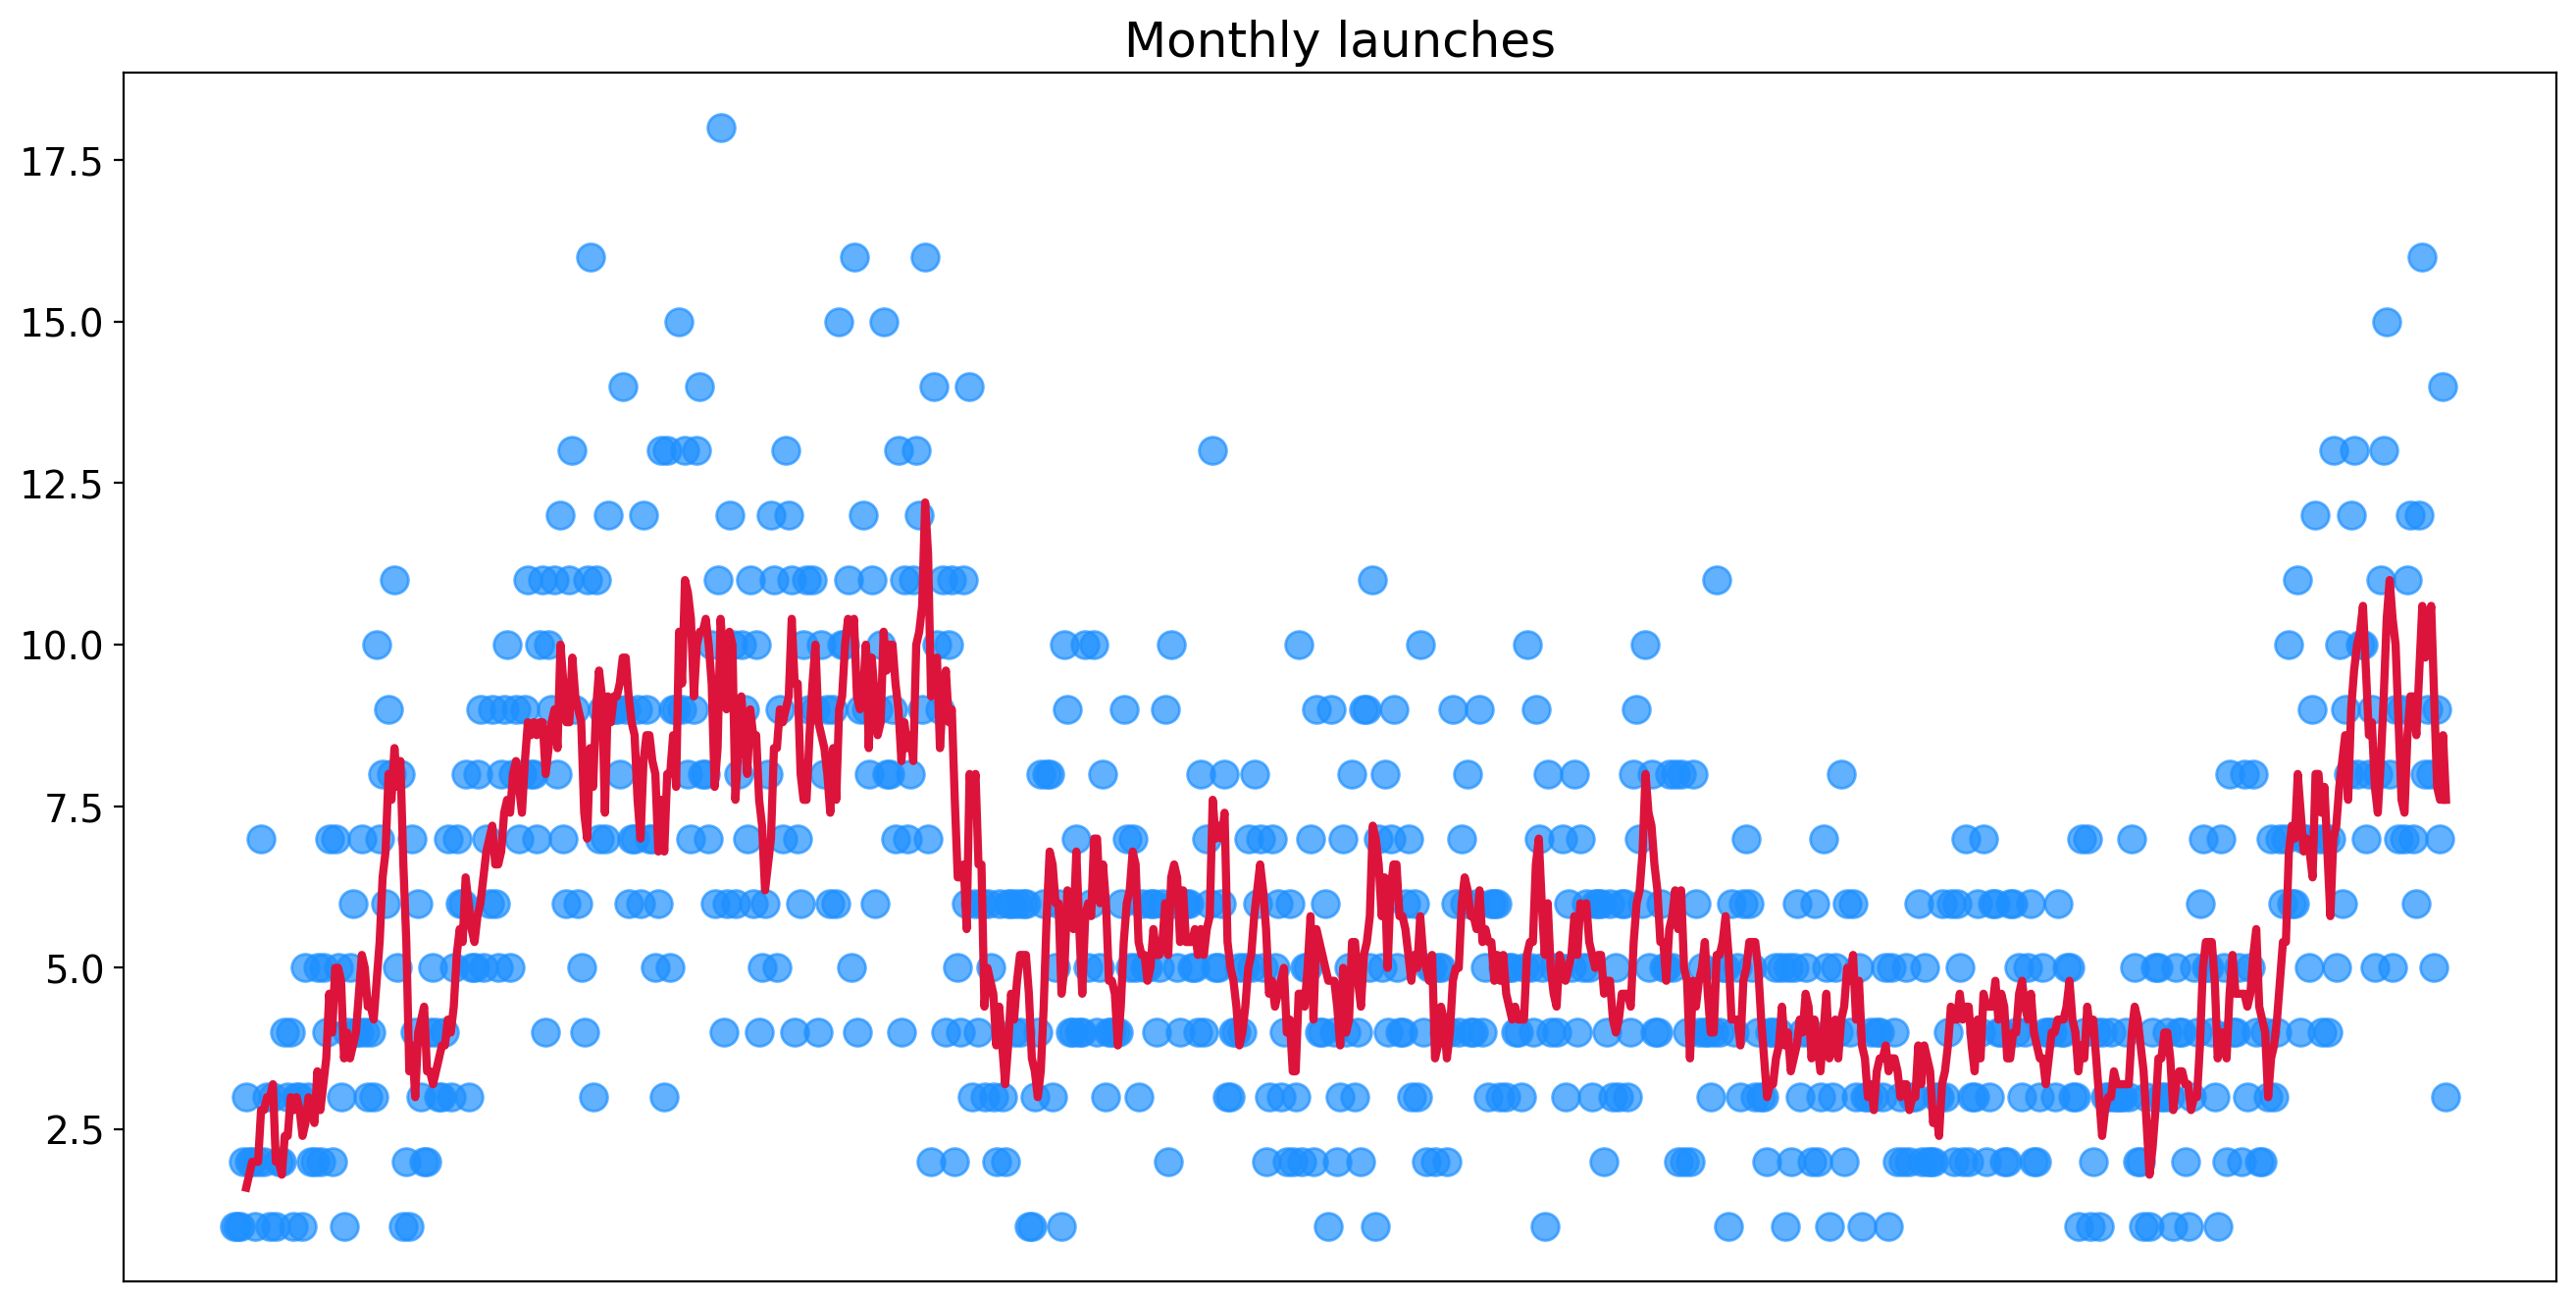

In [239]:
moving_average = monthly_launches['Date'].rolling(window=5).mean()

plt.figure(figsize=(16, 8), dpi=200)
plt.title('Monthly launches', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1955, 2022, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca()  # get current axis

ax.scatter(x=monthly_launches['Year_Month'],
           y=monthly_launches['Date'],
           c='dodgerblue',
           alpha=0.7,
           s=100, )

ax.plot(monthly_launches['Year_Month'],
        moving_average.values,
        c='crimson',
        linewidth=3, )

plt.show()

This chart correlates with the yearly data.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [240]:
avg_monthly_launches = df_data.groupby('Month').agg({'Date': pd.Series.count})
avg_monthly_launches

,Date
Month,
1,268
2,336
3,353
4,383
5,326
6,402
7,351
8,373
9,365


In [241]:
launch_monthly = px.scatter(avg_monthly_launches,
                        x=avg_monthly_launches.index,
                        y='Date',
                        title='Number of Launches per month')
launch_monthly.show()

The most launches happen in December.

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [242]:
money_per_year = df_data.groupby('Year').agg({'Price': pd.Series.mean})

In [243]:
yearly_spending = px.line(money_per_year,
                          x=money_per_year.index,
                          y='Price')
yearly_spending.show()

There are missing data points(before 1964, 1973-1981), but from the available data, we can see the price rose until 1972, than declined, started rising again to its peak of more than a billion USD per launch in 1987, and declined ever since to the current price of 56 million USD per launch.

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [244]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4323
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Organisation        4323 non-null   object        
 1   Location            4323 non-null   object        
 2   Date                4323 non-null   object        
 3   Detail              4323 non-null   object        
 4   Rocket_Status       4323 non-null   object        
 5   Price               963 non-null    float64       
 6   Mission_Status      4323 non-null   object        
 7   New_Date            4323 non-null   datetime64[ns]
 8   Year                4323 non-null   int64         
 9   Month               4323 non-null   int64         
 10  Year_Month          4323 non-null   object        
 11  Country             4323 non-null   object        
 12  Country_Convention  4323 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), obje

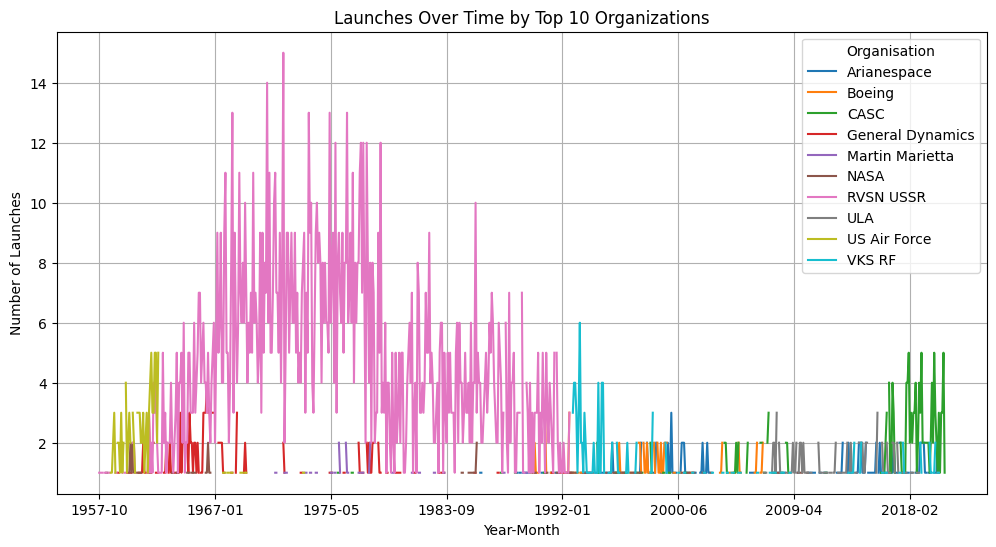

In [245]:
# Group by 'Organisation' and 'Year_Month', count the number of launches, and reset the index
launch_counts = df_data.groupby(['Organisation', 'Year_Month']).size().reset_index(name='Launch Count')

# Find the top 10 organizations with the most launches
top_10_organizations = launch_counts.groupby('Organisation')['Launch Count'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 organizations
top_10_launches = launch_counts[launch_counts['Organisation'].isin(top_10_organizations)]

# Pivot the data to create a table suitable for plotting
launch_pivot = top_10_launches.pivot(index='Year_Month', columns='Organisation', values='Launch Count')

# Create a line chart to visualize the data
launch_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Launches Over Time by Top 10 Organizations')
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation')
plt.grid(True)
plt.show()

Before the end of the cold war the RVSN USSR has dominated the space race, then different American organisations were at the top.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [246]:
# creating a dataframe with only entries predating 1992
cold_war = df_data.loc[df_data['Year'] < 1992]
# taking into account only USA, USSR and Soviet Republics
cold_countries = ['USA', 'Russia', 'Kazakhstan']
cold_launches = cold_war[cold_war['Country'].isin(cold_countries)]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [247]:
cold_war_by_country = cold_launches.groupby('Country').agg({'Date': pd.Series.count})
cold_war_by_country

,Date
Country,
Kazakhstan,582
Russia,1188
USA,662


In [248]:
war = px.pie(cold_war_by_country,
             values='Date',
             names=cold_war_by_country.index)
war.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [249]:
yearly_cold_war = cold_launches.groupby(by=['Country', 'Year'], as_index=False).agg({'Date': pd.Series.count})

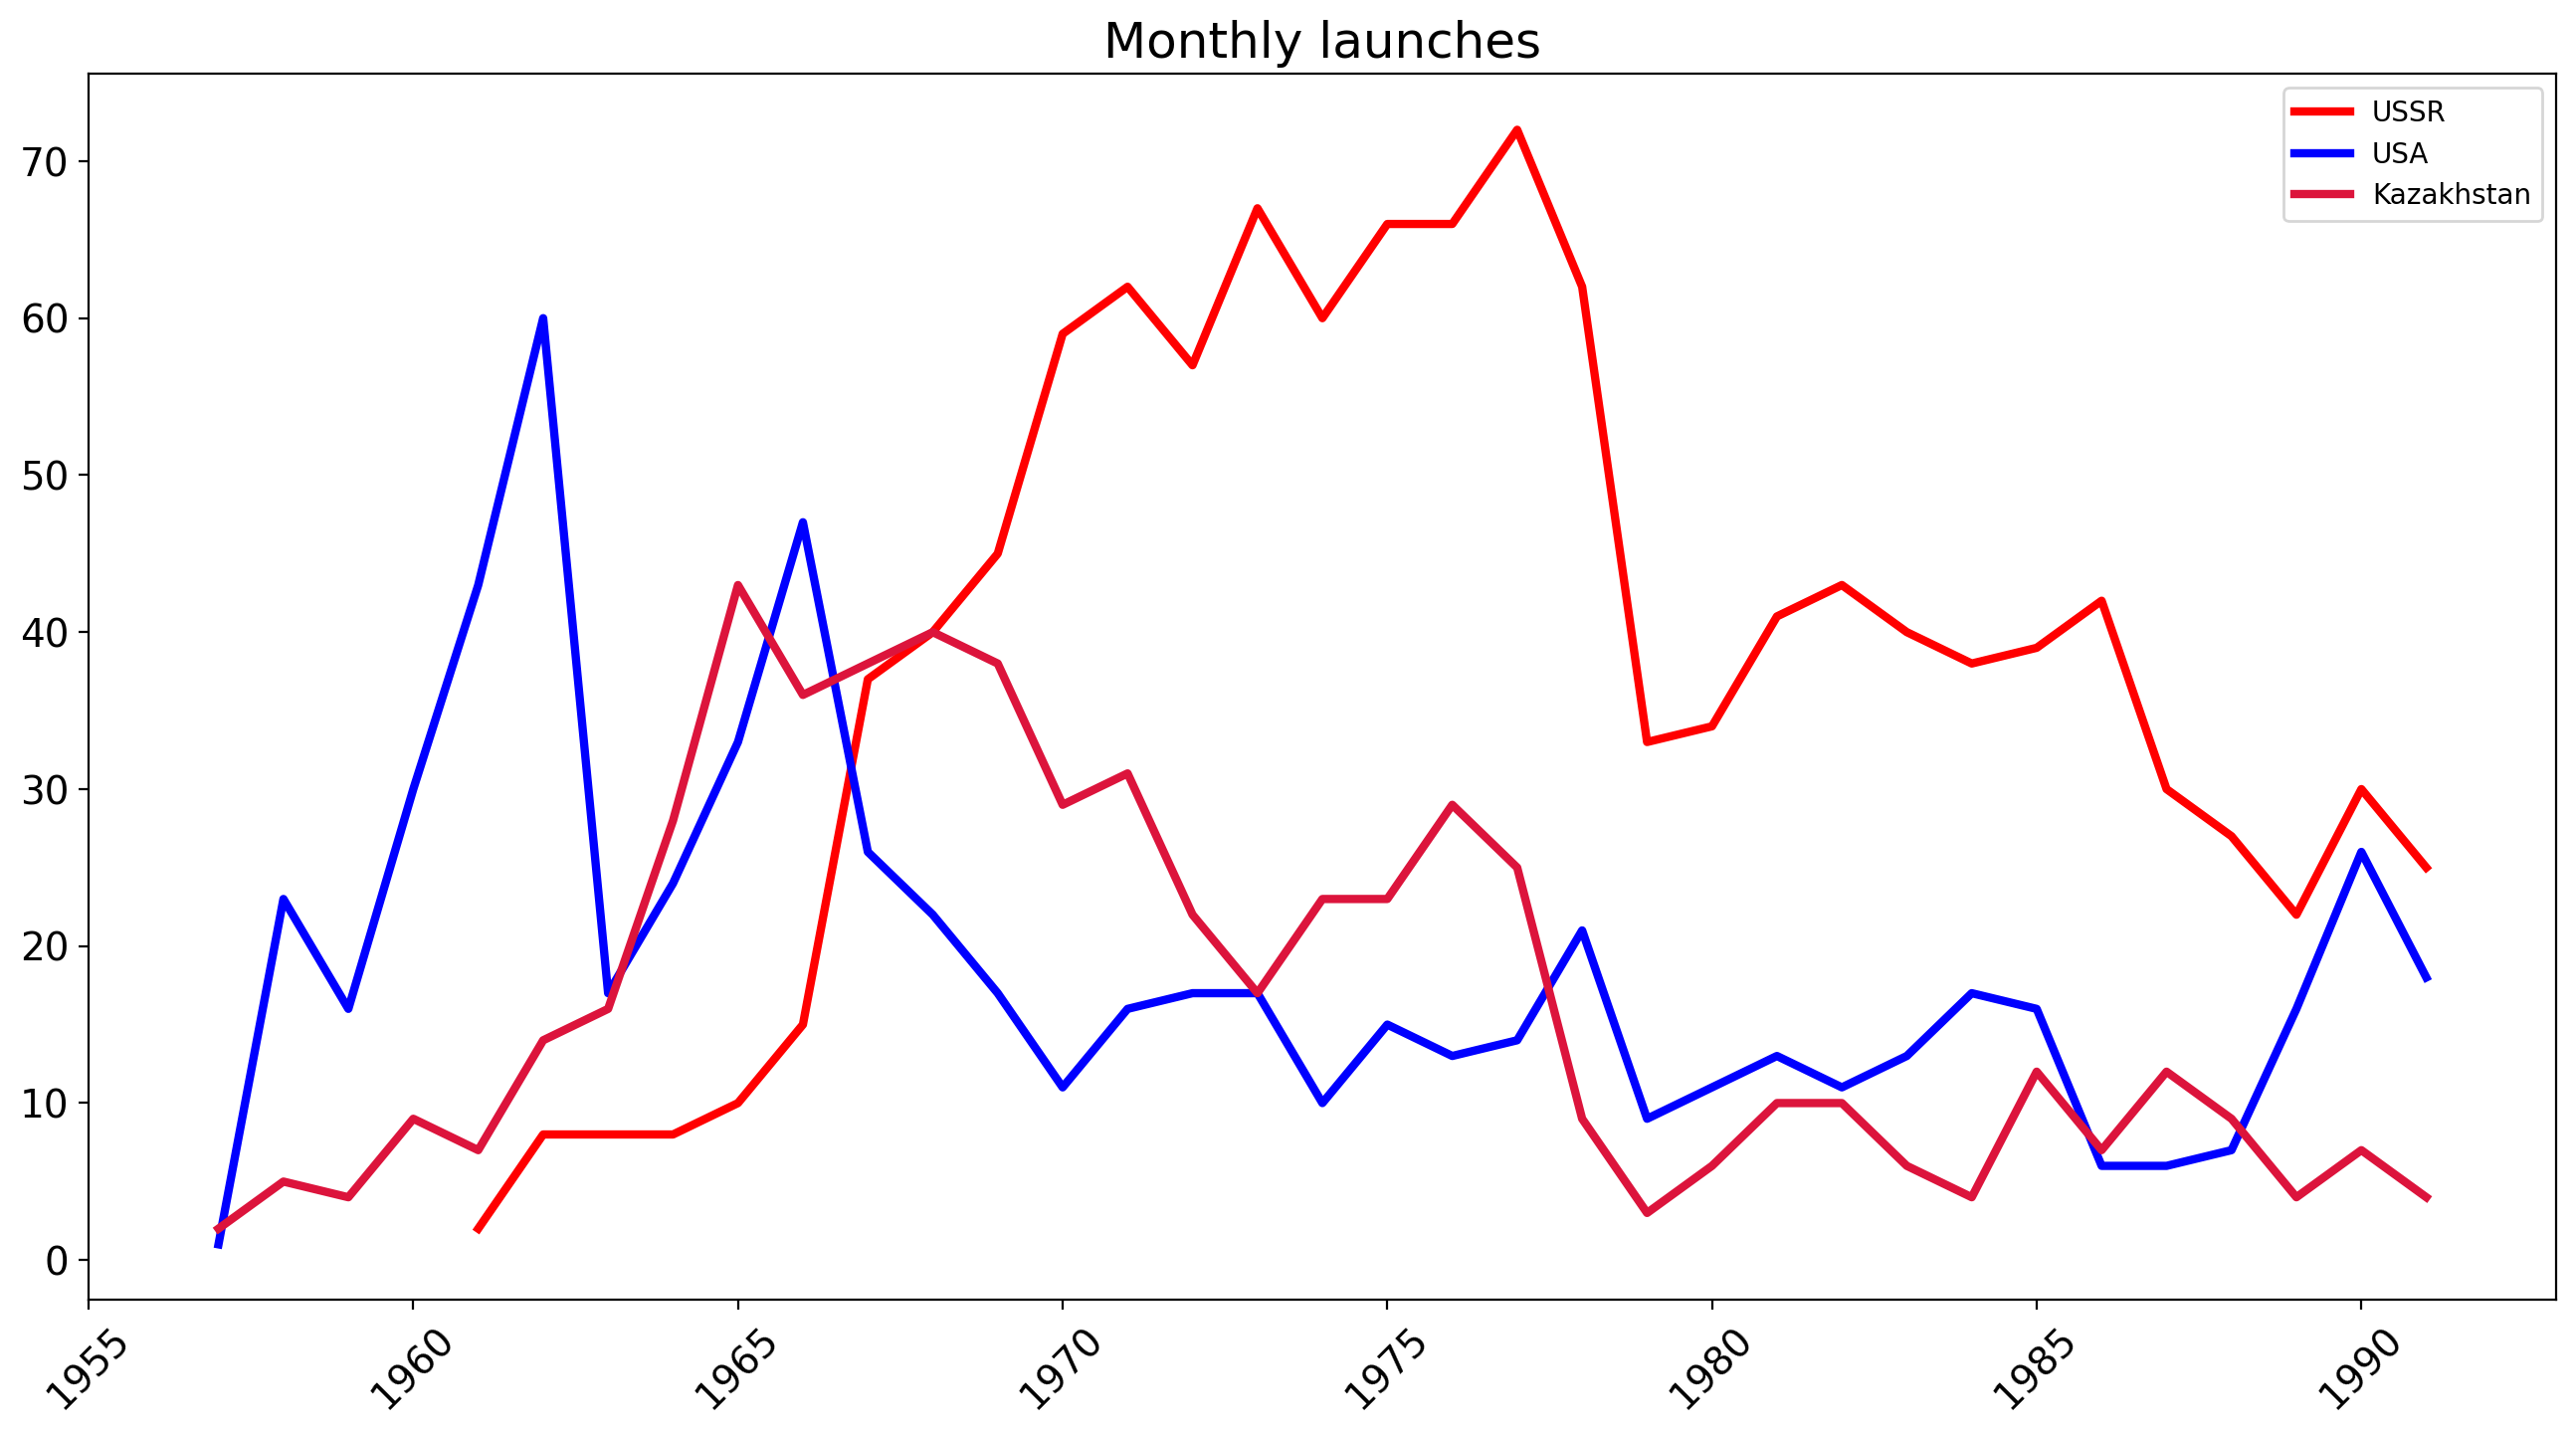

In [250]:
# creating separate dataframes for the 3 countries
kaz = yearly_cold_war.loc[yearly_cold_war['Country'] == 'Kazakhstan']
rus = yearly_cold_war.loc[yearly_cold_war['Country'] == 'Russia']
usa = yearly_cold_war.loc[yearly_cold_war['Country'] == 'USA']


plt.figure(figsize=(16, 8), dpi=200)
plt.title('Monthly launches', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1955, 1993, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca()  # get current axis
ax.set_xlim(1955, 1993)

ax.plot(rus['Year'],
        rus['Date'],
        c='red',
        linewidth=3,
        label='USSR')

ax.plot(usa['Year'],
        usa['Date'],
        c='blue',
        linewidth=3,
        label='USA')

ax.plot(kaz['Year'],
        kaz['Date'],
        c='crimson',
        linewidth=3,
        label='Kazakhstan')
plt.legend(loc='upper right')
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [251]:
# classifying all failures in on ecategory
replace_dict = {'Partial Failure': 'Failure',
                'Prelaunch Failure': 'Failure'}

df_data['Mission_Status'] = df_data['Mission_Status'].replace(replace_dict)
failures = df_data.loc[df_data['Mission_Status']=='Failure']
yearly_failures = failures.groupby('Year').agg({'Detail': pd.Series.count})

In [252]:
yearly_fail = px.line(yearly_failures,
                      x=yearly_failures.index,
                      y='Detail')
yearly_fail.show()

Number of failures dropped significantly in the 1970s, and stayed on a similiar level until today, however to draw any conclusions I will need to look at the percentage of failures instead of the absolute number.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [253]:
total_yearly = df_data.groupby('Year').agg({'Detail': pd.Series.count})
yearly_failures['Percentage'] = yearly_failures['Detail'] / total_yearly['Detail']

In [254]:
yearly_fail_perc = px.line(yearly_failures,
                      x=yearly_failures.index,
                      y='Percentage')
yearly_fail_perc.show()

The percentage chart shows, that the amount of failures did indeed go down in time, with a large drop from the peak in 1958, when more than 75% of missions failed, to a level between 5% and 15% for the last 50 years.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

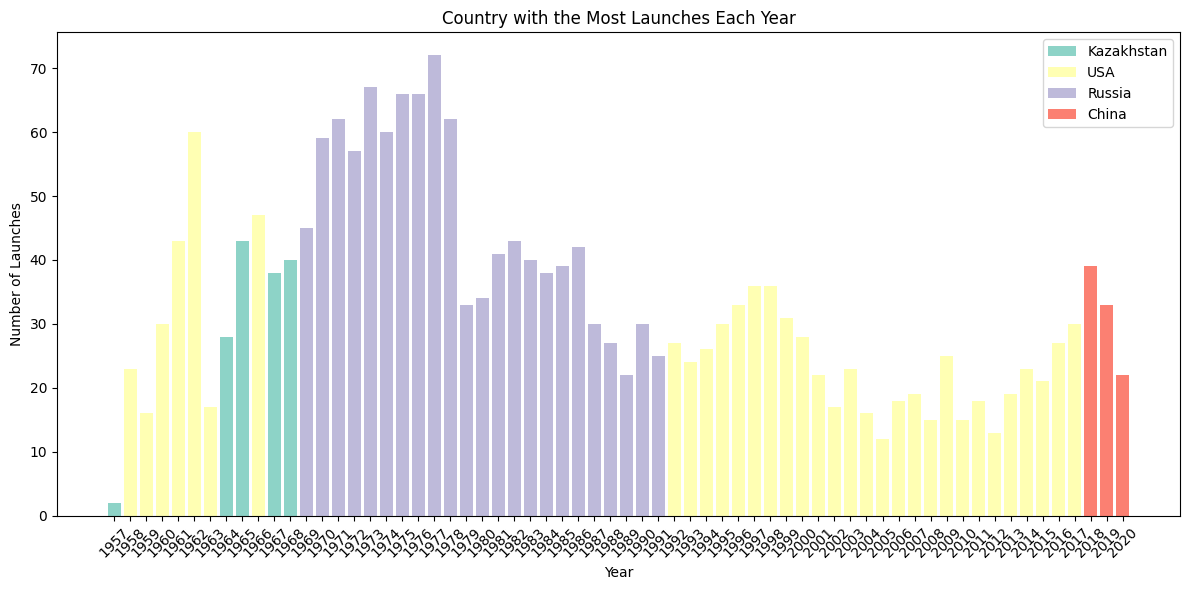

In [255]:
# Group the data by 'Year' and 'Country' and count the number of launches
launch_counts_country = df_data.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

# Find the organization with the most launches each year
lead_country = launch_counts_country.loc[launch_counts_country.groupby('Year')['Launch Count'].idxmax()]

# Define a color palette for organizations
palette = sns.color_palette("Set3", n_colors=len(lead_country['Country'].unique()))

# Create a year-on-year chart with different colors
plt.figure(figsize=(12, 6))
for i, org in enumerate(lead_country['Country'].unique()):
    data = lead_country[lead_country['Country'] == org]
    plt.bar(data['Year'], data['Launch Count'], color=palette[i], label=org)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Country with the Most Launches Each Year')
plt.xticks(lead_country['Year'])
plt.xticks(rotation=45)
plt.legend()  # Show the legend to distinguish organizations
plt.tight_layout()

# Show the chart
plt.show()

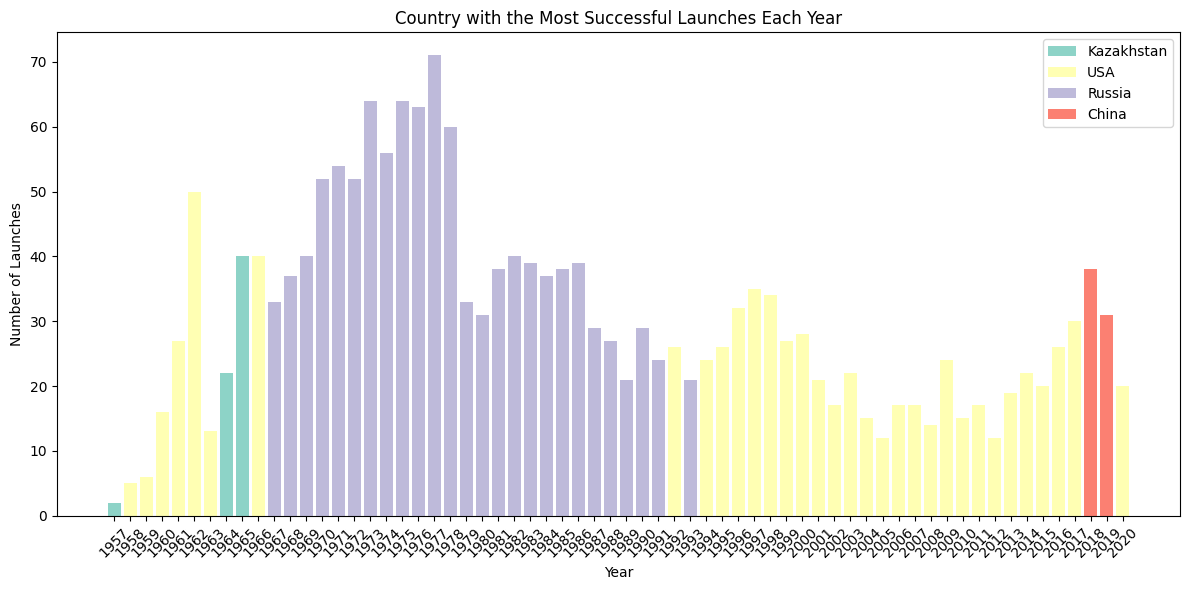

In [256]:
# Only successful launches
df_successes = df_data.loc[df_data['Mission_Status']=='Success']

# Group the data by 'Year' and 'Country' and count the number of launches
launch_counts_country = df_successes.groupby(['Year', 'Country']).size().reset_index(name='Launch Count')

# Find the organization with the most launches each year
lead_country = launch_counts_country.loc[launch_counts_country.groupby('Year')['Launch Count'].idxmax()]

# Define a color palette for organizations
palette = sns.color_palette("Set3", n_colors=len(lead_country['Country'].unique()))

# Create a year-on-year chart with different colors
plt.figure(figsize=(12, 6))
for i, org in enumerate(lead_country['Country'].unique()):
    data = lead_country[lead_country['Country'] == org]
    plt.bar(data['Year'], data['Launch Count'], color=palette[i], label=org)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Country with the Most Successful Launches Each Year')
plt.xticks(lead_country['Year'])
plt.xticks(rotation=45)
plt.legend()  # Show the legend to distinguish organizations
plt.tight_layout()

# Show the chart
plt.show()

Yes, the result changes when we only consider successful launches.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

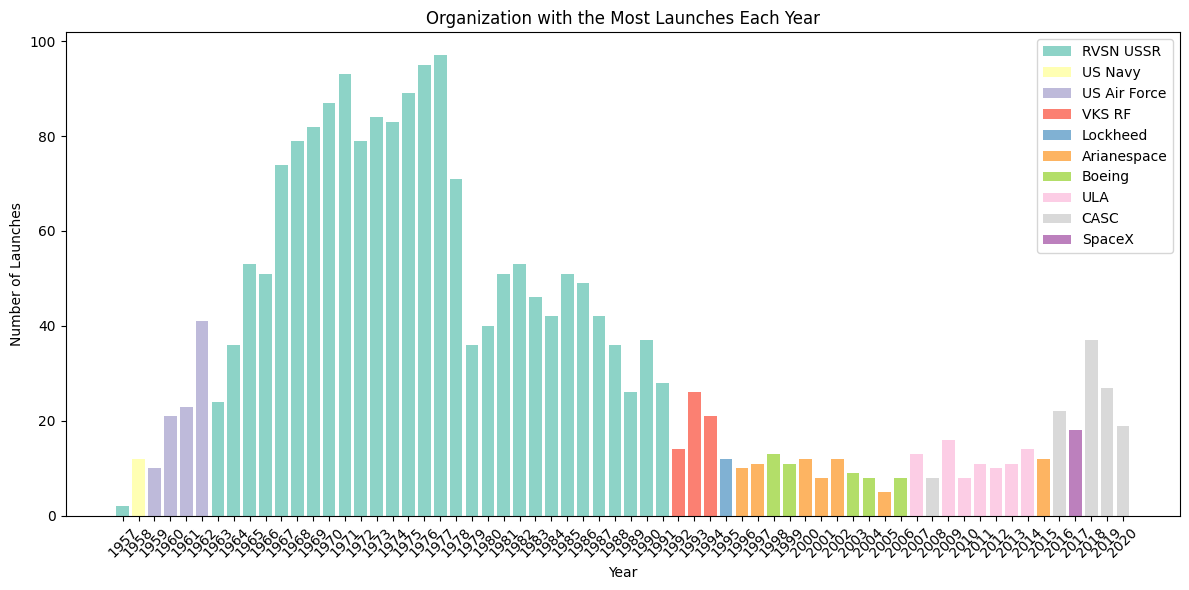

In [257]:
# Group the data by 'Year' and 'Organisation' and count the number of launches
launch_counts = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')

# Find the organization with the most launches each year
lead_organizations = launch_counts.loc[launch_counts.groupby('Year')['Launch Count'].idxmax()]

# Define a color palette for organizations
palette = sns.color_palette("Set3", n_colors=len(lead_organizations['Organisation'].unique()))

# Create a year-on-year chart with different colors
plt.figure(figsize=(12, 6))
for i, org in enumerate(lead_organizations['Organisation'].unique()):
    data = lead_organizations[lead_organizations['Organisation'] == org]
    plt.bar(data['Year'], data['Launch Count'], color=palette[i], label=org)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Organization with the Most Launches Each Year')
plt.xticks(lead_organizations['Year'])
plt.xticks(rotation=45)
plt.legend()  # Show the legend to distinguish organizations
plt.tight_layout()

# Show the chart
plt.show()

The 1970s and 1980s were dominated by the RVSN USSR, while in the last 3 years CASC had the most launches